In [6]:
%matplotlib nbagg

In [13]:
from neurodiffeq import diff
from neurodiffeq.solvers import Solver2D
from neurodiffeq.conditions import IBVP1D
from neurodiffeq.networks import FCNN
from neurodiffeq.monitors import Monitor2D
from neurodiffeq.generators import Generator2D
from neurodiffeq.pde import make_animation
import torch
import numpy as np

Training Progress:   0%|                                                                       | 0/500 [00:00<…

<IPython.core.display.Javascript object>


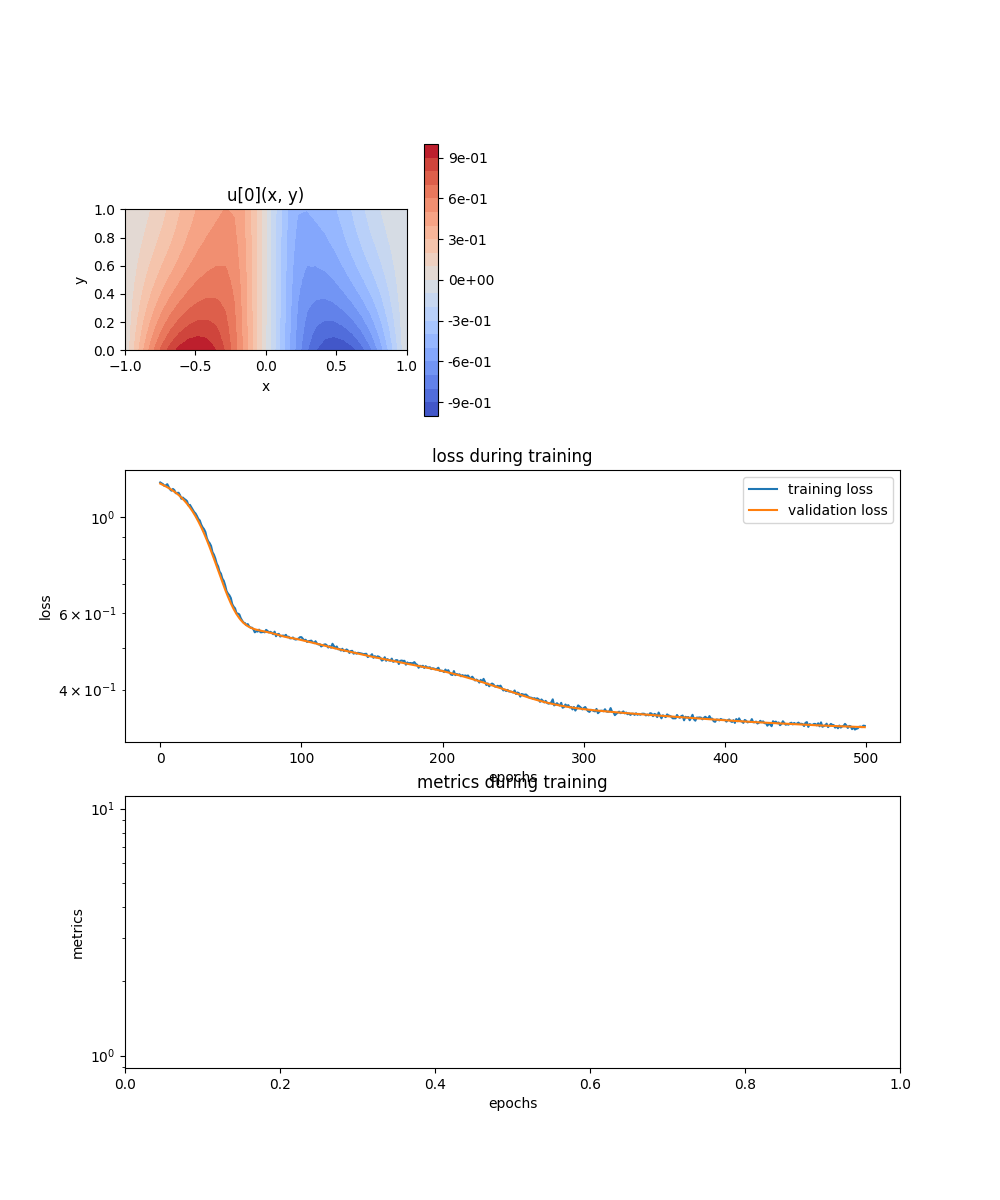

In [33]:
x0 = -1
x1 = 1
t0 = 0
t1 = 1

# Define equation
def burgers_eq(u, x, t):
    return [diff(u, t) + u * diff(u, x) - (0.01 / np.pi) * diff(u, x, order=2)]

# Boundary conditions
conditions = [
    IBVP1D(
        t_min=t0, t_min_val=lambda x: -torch.sin(np.pi * x),
        x_min=x0, x_min_val=lambda y: 0,
        x_max=x1, x_max_val=lambda y: 0,
    )
]

# Define the neural network to be used
nets = [
    FCNN(n_input_units=2, hidden_units=(32, 32, 32))
]

# Define the monitor callback
monitor=Monitor2D(check_every=10, xy_min=(x0, t0), xy_max=(x1, t1))
monitor_callback = monitor.to_callback()

# Instantiate the solver
solver = Solver2D(
    pde_system=burgers_eq,
    conditions=conditions,
    xy_min=(x0, t0), 
    xy_max=(x1, t1),
    nets=nets,
    train_generator=Generator2D((32, 32), (x0, t0), (x1, t1), method='equally-spaced-noisy'),
    valid_generator=Generator2D((32, 32), (x0, t0), (x1, t1), method='equally-spaced'),
)

# Fit the neural network
solver.fit(max_epochs=500, callbacks=[monitor_callback])

# Obtain the solution
solution_neural_net = solver.get_solution()

<IPython.core.display.Javascript object>


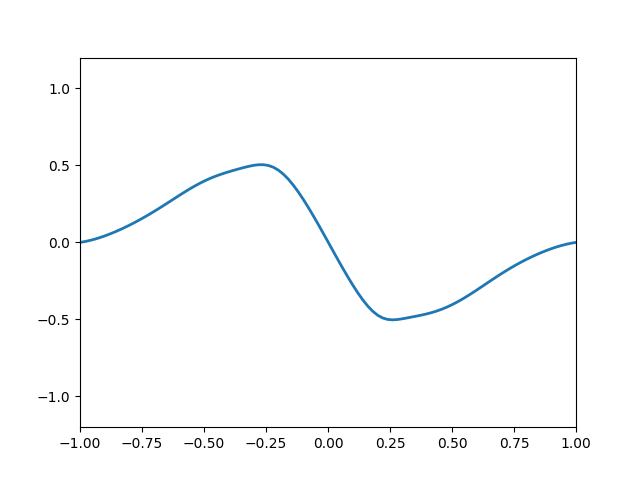

In [34]:
xs = np.linspace(x0, x1, 101)
ts = np.linspace(t0, t1, 101)
xx, tt = np.meshgrid(xs, ts)
make_animation(solution_neural_net, xs, ts)